# Oefentoets Computational Modelling
Deze oefentoets bestaat uit twee opdrachten met verschillende opgaven per opdracht. In de eerste opdracht gaan jullie aan de slag met het verkennen van een dataset en in de tweede opdracht met unsupervised learning. Voor deze oefentoets hebben jullie 60 minuten de tijd.

Lees de instructies hieronder goed door.

### Beantwoorden vragen
Licht jouw uitwerking toe. Documenteer belangrijke stukken code en licht jouw werkwijze toe. 

#### Code documenteren
Simpele code zoals het aanmaken van een leeg array of een train_test_split functie aanroepen hoeft niet toegelicht te worden, maar wanneer je iets doet dat belangrijk is om te begrijpen omdat het essentieel is voor de opdracht moet toegelicht worden. Leg dit uit m.b.v. commentaar bij de code.

#### Werkwijze toelichten
Om tot een oplossing te komen, voer je vaak meerdere stappen uit. Leg uit welke stappen je uitvoert, waarom deze stappen nodig zijn, de volgorde, etc. Gebruik hier voor een aparte 'Markdown' cel.

#### Gebruik van online bronnen
Je mag de documentatie van numpy, pandas, sklearn, etc. raadplegen. Je mag ook gebruik maken van websites als stackoverflow.com maar je mag geen code kopiëren van die sites.

Je mag ook gebruik maken van Copilot, ChatGPT of andere AI-tools maar je mag die code ook niet zomaar kopiëren: gebruik de resultaten van de prompts puur als inspiratie. Daarnaast moet je de prompts als bronvermelding noemen.

Je mag Copilot, ChatGPT of andere AI-tools **niet** gebruiken voor het documenteren, toelichten van de werkwijze of voor het beantwoorden van open vragen.

Bij het vermoeden van onrechtmatig gebruik van bronnen zal een individueel assessment volgen.

## Opdracht 1
In deze opdracht gaan jullie een dataset verkennen. We gebruiken hiervoor de IMDB movieset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('movie.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
# df.isna().sum().sum()
# df.duplicated().sum()

In [4]:
# df.dropna(inplace=True)
# df.drop_duplicates(inplace=True)

In [5]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


**Opgave 1.1.**

Bepaal of de kolommen `['duration','gross','budget','imdb_score']` outliers bevatten. Zo ja, zijn het zwakke of sterke outliers?

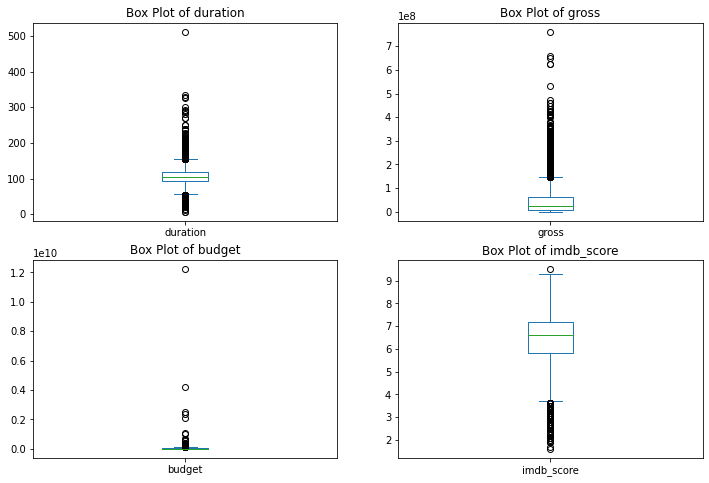

In [6]:
names = ['duration', 'gross', 'budget', 'imdb_score']

plt.figure(figsize=(12, 8))

for i, n in enumerate(names):
    plt.subplot(2, 2, i+1)
    df[n].plot.box()
    plt.title(f'Box Plot of {n}')

In [7]:
def amount_weak_outlier(dataframe, column_name):
    Q1 = dataframe[column_name].quantile(.25)
    Q3 = dataframe[column_name].quantile(.75)
    IQR = Q3 - Q1
    outliers = dataframe[(dataframe[column_name] < (Q1 - 1.5 * IQR)) | (dataframe[column_name] >  (Q1 + 1.5 * IQR))]
    print(f'{column_name}: Number of weak outliers: {len(outliers)}')

In [8]:
def amount_extreem_outlier(dataframe, column_name):
    Q1 = dataframe[column_name].quantile(.25)
    Q3 = dataframe[column_name].quantile(.75)
    IQR = Q3 - Q1
    outliers = dataframe[(dataframe[column_name] < (Q1 - 3 * IQR)) | (dataframe[column_name] >  (Q1 + 3 * IQR))]
    print(f'{column_name}: Number of extreem outliers: {len(outliers)}')

In [9]:
names = ['duration','gross','budget','imdb_score']

for n in names:
    amount_extreem_outlier(df, n)
    amount_weak_outlier(df, n)
    print('\n')

duration: Number of extreem outliers: 116
duration: Number of weak outliers: 674


gross: Number of extreem outliers: 227
gross: Number of weak outliers: 658


budget: Number of extreem outliers: 252
budget: Number of weak outliers: 715


imdb_score: Number of extreem outliers: 0
imdb_score: Number of weak outliers: 447




Alle kolommen hebben outliers, daarvan hebben duration, gross, en budget extremen outliers en imdb_score zwakke outliers.

**Opgave 1.2**

Bepaal het gemiddelde en de mediaan van `gross`. Verklaar hoe het mogelijk is dat er een verschil is tussen deze twee waarden.

**Merk op:** voor het open deel van deze vraag mag je geen gebruik maken van Copilot, ChatGPT of andere AI-tools.

In [10]:
print('mean:', df['gross'].mean())
print('median:', df['gross'].median())

mean: 48468407.52680933
median: 25517500.0


Het verschil tussen de twee waardes is omdat het gemiddelde omhoog/omlaag wordt getrokken door de extreem hoge/lage opbrengste van films, in dit geval zijn er een paar films met extreem hoge opbrengst waardoor het gemiddelde hoger is, de mediaan wordt hierdoor niet beinvloed waardoor er een afwijking tussen de twee zit.

**Opgave 1.3.**

Bepaal de correlatie tussen de kolommen `['duration','gross','budget', 'imdb_score']` onderling. Stel je gaat een model trainen met `imdb_score` als target variabele. Welke conclusies kun je dan trekken op basis van deze analyse.

duration      0.261662
gross         0.198021
budget        0.030688
imdb_score    1.000000
Name: imdb_score, dtype: float64

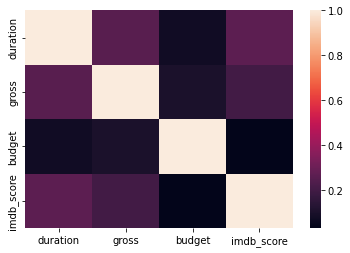

In [11]:
corr = df[['duration', 'gross', 'budget', 'imdb_score']].corr()
sns.heatmap(corr)
corr['imdb_score']

Er zijn weinig correlatie tussen de kolommen en imdb_score, dat kan je zien aan de heatmap en de correlatie score, deze hoogste correlatie is met duration en die is maar 0.26, een sterke correlatie zit rond de 0.8 zitten.

**Opgave 1.4.**

Toon de volgende gegevens:

1. Een overzicht van de gemiddelde IMDB scores per regisseur (`director_name`), aflopend gesorteerd
2. Een overzicht van de drie films met de langste duur
3. Een overzicht van de duur en IMDB score van alle Franstalige films (`language = 'French'`) uit 2014 en 2015
4. Uitbreiding op vraag 3: toon de gemiddelde duur en IMDB score van deze films

In [12]:
group = df.groupby(['director_name'])
group['imdb_score'].mean().sort_values(ascending=False)

director_name
John Blanchard        9.5
Mitchell Altieri      8.7
Sadyk Sher-Niyaz      8.7
Cary Bell             8.7
Mike Mayhall          8.6
                     ... 
Georgia Hilton        2.2
Vondie Curtis-Hall    2.1
Frédéric Auburtin     2.0
A. Raven Cruz         1.9
Lawrence Kasanoff     1.7
Name: imdb_score, Length: 2398, dtype: float64

In [13]:
df.sort_values(by=['duration'], ascending=False).head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1710,Color,NaN,16.0,511.0,NaN,51.0,Ingvar Eggert Sigurðsson,147.0,NaN,Crime|Drama|Thriller,...,19.0,Icelandic,Iceland,NaN,NaN,NaN,63.0,8.2,16.00,0
2466,Color,NaN,108.0,334.0,NaN,30.0,Nora von Waldstätten,897.0,145118.0,Biography|Crime|Drama|Thriller,...,36.0,English,France,Not Rated,NaN,NaN,30.0,7.7,2.35,0
1501,Color,Taylor Hackford,12.0,330.0,138.0,672.0,Jesse Borrego,848.0,4496583.0,Crime|Drama,...,129.0,English,USA,R,35000000.0,1993.0,674.0,8.0,1.66,6000


In [14]:
films_frans = df.loc[(df['language'] == 'French') & (df['title_year'] >= 2014.0) & (df['title_year'] <= 2015)]
films_frans

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
489,Color,Lucile Hadzihalilovic,63.0,81.0,92.0,8.0,Roxane Duran,23.0,NaN,Drama|Horror|Mystery|Sci-Fi,...,3.0,French,France,NaN,NaN,2015.0,21.0,6.4,2.35,257
1178,Color,Jamel Debbouze,9.0,101.0,326.0,6.0,Youssef Hajdi,326.0,NaN,Adventure|Animation|Comedy|Family,...,5.0,French,France,NaN,NaN,2015.0,152.0,4.9,NaN,161
3088,Color,Eric Lartigau,94.0,106.0,7.0,24.0,Eric Elmosnino,68.0,NaN,Comedy|Drama|Music,...,27.0,French,France,NaN,11000000.0,2014.0,29.0,7.4,1.85,0
3313,Color,Eric Lavaine,17.0,98.0,0.0,5.0,Julie Engelbrecht,186.0,NaN,Comedy,...,1.0,French,France,NaN,NaN,2014.0,41.0,6.1,2.35,348
3437,Color,David Oelhoffen,102.0,101.0,2.0,40.0,Reda Kateb,10000.0,NaN,Drama|War|Western,...,19.0,French,France,NaN,7700000.0,2014.0,154.0,7.3,2.35,2000
4455,Color,Mathieu Amalric,92.0,76.0,412.0,3.0,Léa Drucker,412.0,231186.0,Crime|Romance|Thriller,...,16.0,French,France,R,NaN,2014.0,4.0,6.3,1.33,389
4714,Color,Johanna Schwartz,22.0,105.0,0.0,0.0,Garba Touré,0.0,NaN,Documentary,...,2.0,French,UK,NaN,400000.0,2015.0,0.0,7.7,NaN,34


In [15]:
gem_d = films_frans['duration'].mean()
gem_i = films_frans['imdb_score'].mean()

print(f'Gemiddelde duration: {gem_d}')
print(f'Gemiddelde imdb_score: {gem_i}')

Gemiddelde duration: 95.42857142857143
Gemiddelde imdb_score: 6.585714285714286


## Opdracht 2
In deze opdracht gaan jullie een model trainen met behulp van unsupervised learning.

In [16]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [17]:
#X is een random gemaakt numpy array met twee features
X, _ = make_blobs(n_samples=400, centers=7,
                       cluster_std=0.90, random_state=0)

**Opgave 2.1**

Maak een visualisatie die de relatie tussen de twee features in X weergeeft. Zijn er relaties of verbanden te zien?

Ja er zijn relaties of verbanden te zien, er zijn apparte groepen die je zou verwachten in de scatterplot.

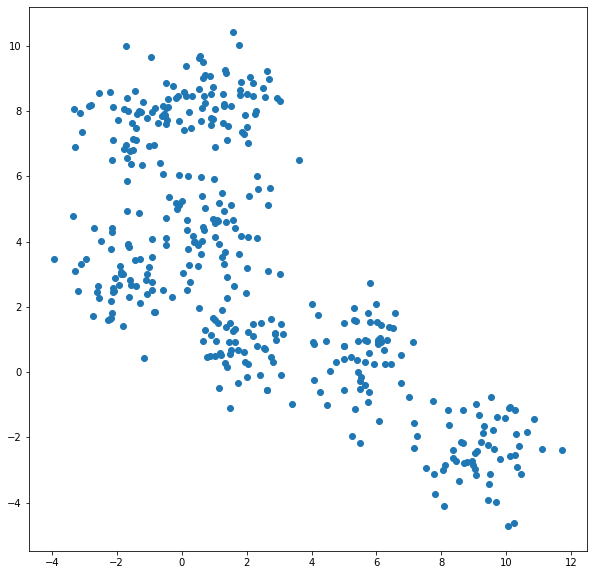

In [18]:
plt.scatter(X[:,0],X[:,1],marker='o')
plt.gcf().set_size_inches((10, 10))  
plt.show()

**Opgave 2.2.**

Gebruik `KMeans` om een clustering te maken van de punten in array `X`. Kies voor `k` = 5.

In [19]:
model_kMeans = KMeans()

In [20]:
model_kMeans.set_params(n_clusters=5, random_state = 0)

KMeans(n_clusters=5, random_state=0)

In [21]:
pred = model_kMeans.fit_predict(X)

**Opgave 2.3.**

Bepaal de score van gevonden clustering.

In [22]:
model_kMeans.score(X)

-1081.222314259273

**Opgave 2.4.**

Pas de scatterplot van opgave 2.1 aan en visualiseer de gevonden clusters.

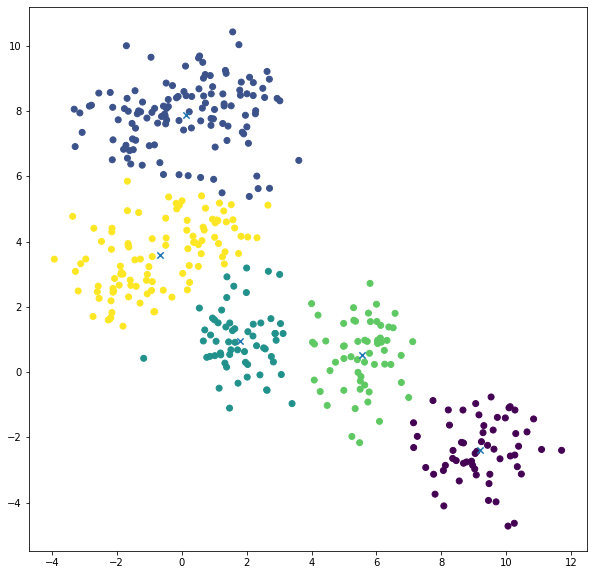

In [23]:
plt.scatter(X[:,0],X[:,1],marker='o', c=pred)
plt.scatter(model_kMeans.cluster_centers_[:,0],model_kMeans.cluster_centers_[:,1],marker='x', s=40)
plt.gcf().set_size_inches((10, 10))
plt.show()

**Opgave 2.5.**

Maak een clustering voor `k` = 1 t/m 20. Geef aan voor welke `k` de clustering het _beste_ is. Onderbouw wat je onder het _beste_ verstaat.

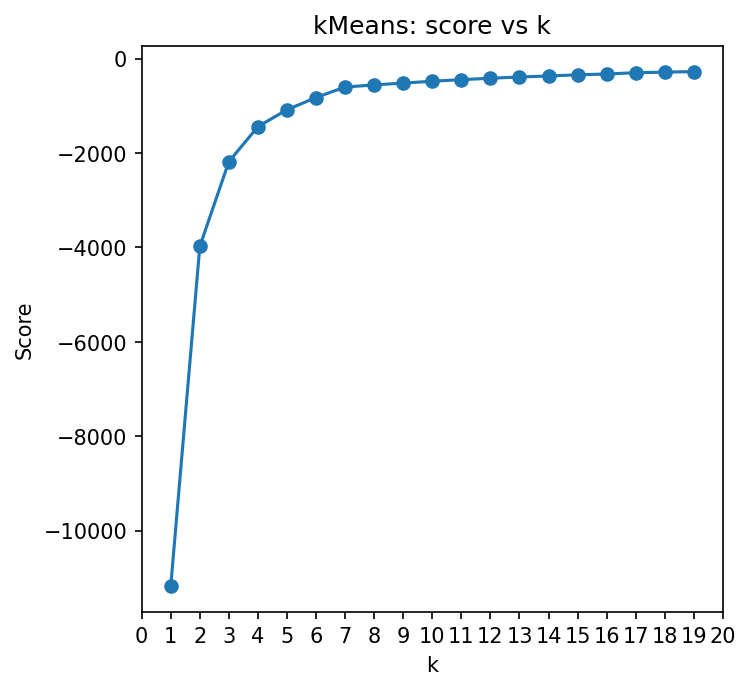

In [24]:
data = []

max_n = 20

for i in range(1, max_n):
    model_kMeans = KMeans(n_clusters=i, random_state=0)
    prediction_kMeans = model_kMeans.fit_predict(X)
    data.append([i, model_kMeans.score(X)])

df = pd.DataFrame(data, columns=['k', 'Score'])

fig = plt.figure(figsize=(5,5), dpi=150)

# object axes: de grafiekbasis
ax = plt.axes()

ax.set(xlim=(0,max_n),
       xlabel='k',
       ylabel='Score',
       title='kMeans: score vs k')

ax.xaxis.set_major_locator(plt.MaxNLocator(20))
ax.ticklabel_format(useOffset=False)
ax.plot(np.array(df['k']), np.array(df['Score']), '-o')

In het diagram is het optimale aantal k de knik waarbij de verbetering daarna afloopt is dan voor de knik, in dit diagram zie je de knik bij k=3.

**Opgave 2.6.**

Maak ook een clustering met `GaussianMixture` met de in opgave 2.5 gekozen `k`. 

In [25]:
model_gmm = GaussianMixture()
model_gmm.set_params(n_components=3, random_state=0)
pred_gmm = model_gmm.fit_predict(X)

In [26]:
model_kmeans = KMeans()
model_kmeans.set_params(n_clusters=3, random_state=0)
pred_kmeans = model_kmeans.fit_predict(X)

**Opgave 2.7.**

Hoeveel punten uit X worden door `KMeans` en `GaussianMixture` in verschillende clusters ingedeeld. 

In [27]:
dif = pred_gmm - pred_kmeans
count = 0

for i in dif:
    if i != 0:
        count += 1

print(f'Aantal punten in verschillende clusters: {count}')

Aantal punten in verschillende clusters: 21


## Einde toets
Voer `Restart & Run All` uit onder `Kernel` en check of er geen errors zijn.